# data

In [ ]:
# %cd /home/lab16/cnn/dataset/TRAIN
# !unzip /home/lab16/cnn/dataset/TRAIN.zip

In [ ]:
# %cd /home/lab16/cnn/dataset/VALID
# !unzip /home/lab16/cnn/dataset/VALID.zip

In [ ]:
# %cd /home/lab16/cnn/dataset/VALID
# !unzip /home/lab16/cnn/dataset/VALID/data.zip

In [ ]:
# %cd /home/lab16/cnn/dataset/TRAIN
# %cd /home/lab16/cnn/dataset/VALID

/home/lab16/cnn/dataset/VALID


In [ ]:
# -al로 숨겨져있는 파일 확인하기
# %ls -al

total 28
drwxr-xr-x 5 lab16 multi  4096 Feb 16 21:57 ./
drwxr-xr-x 8 lab16 multi  4096 Feb 16 21:53 ../
drwxr-xr-x 2 lab16 multi  4096 Feb 16 21:57 .ipynb_checkpoints/
drwxr-xr-x 2 lab16 multi  4096 Feb 16 21:47 with-leash/
drwxr-xr-x 2 lab16 multi 12288 Feb 16 21:48 without-leash/


In [ ]:
#  .ipynb_checkpoints 파일 제거하기
# %rm -rf .ipynb_checkpoints

In [ ]:
%cd /home/lab16/cnn/Modeling/RESNET

/home/lab16/cnn/Modeling/RESNET


In [ ]:
pwd

'/home/lab16/cnn/Modeling/RESNET'

# 라이브러리 호출

In [ ]:
from keras.applications.resnet_v2 import ResNet101V2, preprocess_input,decode_predictions
from keras.preprocessing.image import img_to_array
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization,AveragePooling2D,GlobalAveragePooling2D
from keras.initializers import HeUniform
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizer_v2.adam import Adam
import numpy as np
from PIL import Image
import cv2
from tensorflow import keras

# 데이터 불러오기

In [ ]:
img_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
base_model = ResNet101V2(weights = 'imagenet',include_top = False,input_shape=(224,224,3))

In [ ]:
## dataset1
# Found 2274 images belonging to 2 classes.
# Found 562 images belonging to 2 classes.

In [ ]:
## 0216 dataset
# Found 3459 images belonging to 2 classes.
# Found 412 images belonging to 2 classes.

In [ ]:
train_loader = img_gen.flow_from_directory(directory='/home/lab16/cnn/dataset/TRAIN',target_size=(224,224),batch_size=64,seed=42)
test_loader = img_gen.flow_from_directory(directory='/home/lab16/cnn/dataset/VALID',target_size=(224,224),batch_size=64,seed=42)

Found 3459 images belonging to 2 classes.
Found 412 images belonging to 2 classes.


In [ ]:
idx_to_classes={val:key for key, val in train_loader.class_indices.items()}
idx_to_classes

{0: 'with-leash', 1: 'without-leash'}

In [ ]:
for layer in base_model.layers[:-20]:
    layer.trainable=False

In [ ]:
base_model.summary()

In [ ]:
last_layer = base_model.get_layer(base_model.layers[-1].name)
last_output = last_layer.output
x = Flatten()(last_output)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(2, activation ='softmax')(x)

In [ ]:
new_model = Model(inputs = base_model.input,outputs = x, name='ResNet101V2_dataset2')

In [ ]:
new_model.compile(loss='categorical_crossentropy', 
              optimizer = Adam(learning_rate = 0.001 ),
              metrics=['acc'])

In [ ]:
early_stopping=EarlyStopping(min_delta = 0, patience=10) 
checkpointer = ModelCheckpoint(filepath='checkpointer/0217_ResNet101V2.hdf5',verbose=1,save_best_only = True) 

In [ ]:
hist = new_model.fit(train_loader,
                    epochs=50,  
                    validation_data=test_loader,
                     verbose=1,callbacks=[early_stopping,checkpointer]
                    )

Epoch 1/50
55/55 [==============================] - ETA: 0s - loss: 0.3890 - acc: 0.8511
Epoch 00001: val_loss improved from inf to 25.92530, saving model to checkpointer/0217_ResNet101V2.hdf5


/home/ubuntu/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


55/55 [==============================] - 34s 492ms/step - loss: 0.3890 - acc: 0.8511 - val_loss: 25.9253 - val_acc: 0.4879
Epoch 2/50
55/55 [==============================] - ETA: 0s - loss: 0.2677 - acc: 0.8933
Epoch 00002: val_loss did not improve from 25.92530
55/55 [==============================] - 20s 363ms/step - loss: 0.2677 - acc: 0.8933 - val_loss: 31.7319 - val_acc: 0.4879
Epoch 3/50
55/55 [==============================] - ETA: 0s - loss: 0.1921 - acc: 0.9269
Epoch 00003: val_loss improved from 25.92530 to 0.99640, saving model to checkpointer/0217_ResNet101V2.hdf5
55/55 [==============================] - 29s 521ms/step - loss: 0.1921 - acc: 0.9269 - val_loss: 0.9964 - val_acc: 0.6602
Epoch 4/50
55/55 [==============================] - ETA: 0s - loss: 0.0882 - acc: 0.9659
Epoch 00004: val_loss improved from 0.99640 to 0.91675, saving model to checkpointer/0217_ResNet101V2.hdf5
55/55 [==============================] - 28s 501ms/step - loss: 0.0882 - acc: 0.9659 - val_loss: 0

In [ ]:
# 모델 저장하기
new_model.save("0217_ResNet101V2", include_optimizer=False)

INFO:tensorflow:Assets written to: 0217_ResNet101V2/assets


/home/ubuntu/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/home/ubuntu/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


# 모델 검증

## acc-loss plot

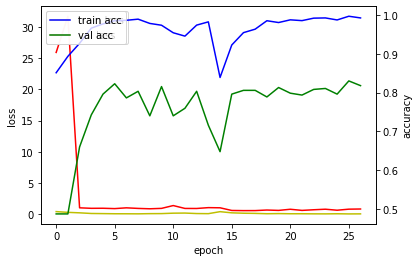

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

## predict

In [ ]:
from keras.models import load_model
new_model=load_model('/home/lab16/cnn/Modeling/RESNET/0217_ResNet101V2')

In [ ]:
imgs_with=['/home/lab16/cnn/dataset/test_img/with/with_1.png',
'/home/lab16/cnn/dataset/test_img/with/with_2.png',
'/home/lab16/cnn/dataset/test_img/with/with_3.png',
'/home/lab16/cnn/dataset/test_img/with/with_4.png']

imgs_without=['/home/lab16/cnn/dataset/test_img/without/without_1.png',
'/home/lab16/cnn/dataset/test_img/without/without_2.png',
'/home/lab16/cnn/dataset/test_img/without/without_3.png',
'/home/lab16/cnn/dataset/test_img/without/without_4.png']

In [ ]:
def pred(img_path):
    print('-'*20)
    Image.open(img_path).convert('RGB').resize((224,224)).show()
    img = keras.preprocessing.image.load_img(img_path, target_size=(224,224))
    array = keras.preprocessing.image.img_to_array(img) # (224,224,3)
    array = np.expand_dims(array, axis=0)  # (1, 299, 299, 3)
    img_array = preprocess_input(array)
    preds = new_model.predict(img_array)
    idx_to_classes={0: 'with-leash', 1: 'without-leash'}
    print(idx_to_classes[np.argmax(preds)])
    print(preds)

--------------------


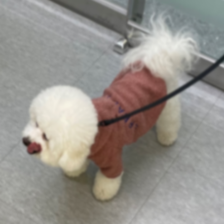

with-leash
[[9.994215e-01 5.785578e-04]]
--------------------


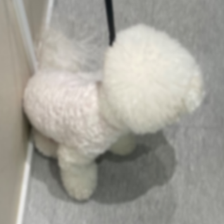

with-leash
[[0.96270114 0.03729887]]
--------------------


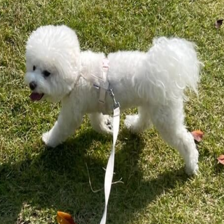

with-leash
[[0.9989743  0.00102564]]
--------------------


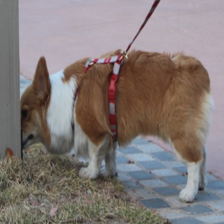

with-leash
[[9.996561e-01 3.439475e-04]]


In [ ]:
for i in imgs_with:
    pred(i)

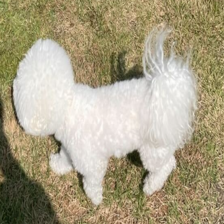

without-leash
[[0.00846191 0.99153817]]
----------


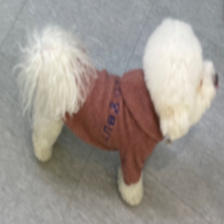

with-leash
[[0.99074453 0.00925545]]
----------


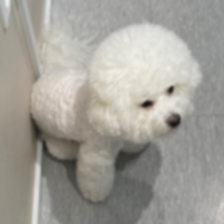

without-leash
[[3.3502103e-04 9.9966502e-01]]
----------


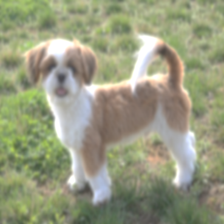

without-leash
[[9.8019780e-04 9.9901974e-01]]
----------


In [ ]:
imgs=[img_without,img_without2,img_without3,img_without4]
for i in imgs:
    pred(i)

--------------------


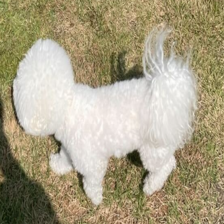

without-leash
[[0.01356404 0.98643595]]
--------------------


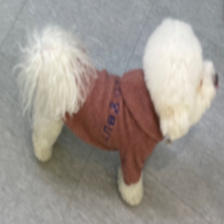

with-leash
[[0.9954709  0.00452914]]
--------------------


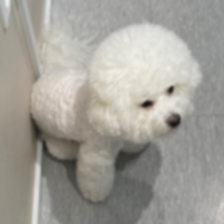

without-leash
[[3.3083896e-04 9.9966919e-01]]
--------------------


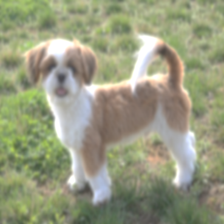

without-leash
[[0.00107307 0.99892694]]


In [ ]:
for i in imgs_without:
    pred(i)

## GradCAM

In [ ]:
new_model.summary()

In [ ]:
import gradcam as gcm
from keras.models import load_model
new_model=load_model('/home/lab16/cnn/Modeling/RESNET/0217_ResNet101V2')

In [ ]:
imgs_with=['/home/lab16/cnn/dataset/test_img/with/with_1.png',
'/home/lab16/cnn/dataset/test_img/with/with_2.png',
'/home/lab16/cnn/dataset/test_img/with/with_3.png',
'/home/lab16/cnn/dataset/test_img/with/with_4.png']

imgs_without=['/home/lab16/cnn/dataset/test_img/without/without_1.png',
'/home/lab16/cnn/dataset/test_img/without/without_2.png',
'/home/lab16/cnn/dataset/test_img/without/without_3.png',
'/home/lab16/cnn/dataset/test_img/without/without_4.png']

### target: with

with-leash
[[9.994215e-01 5.785578e-04]]


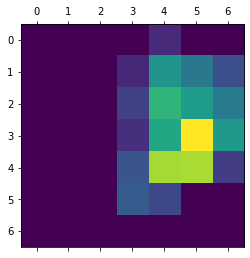

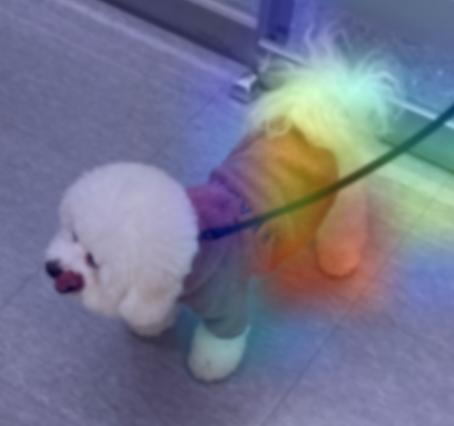

--------------------------------------------------------------------------------
with-leash
[[0.96270114 0.03729887]]


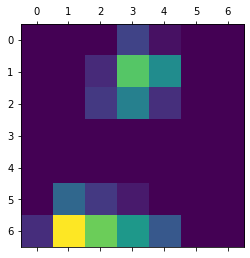

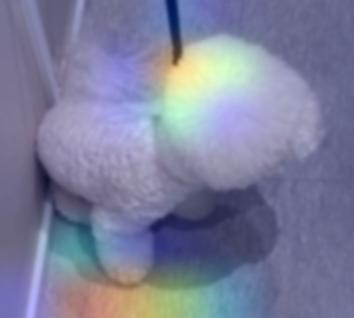

--------------------------------------------------------------------------------
with-leash
[[0.9989743  0.00102564]]


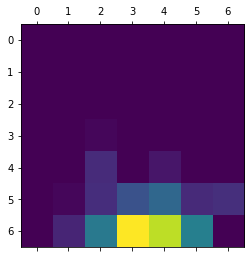

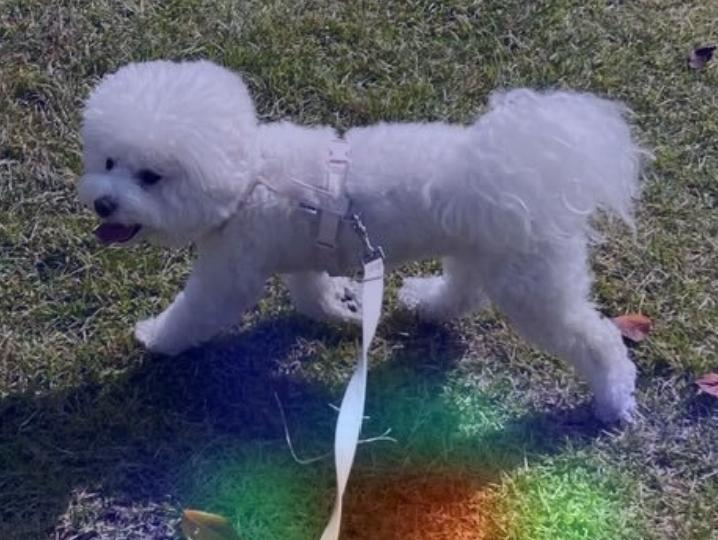

--------------------------------------------------------------------------------
with-leash
[[9.996561e-01 3.439475e-04]]


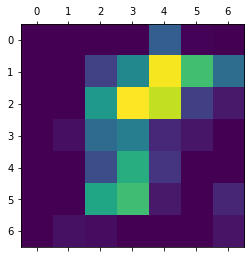

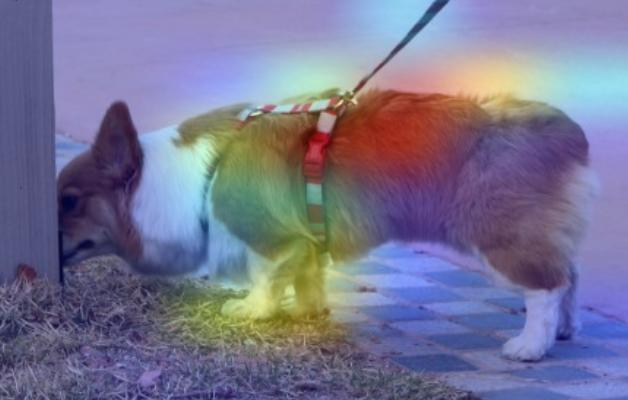

--------------------------------------------------------------------------------


In [ ]:
for i in imgs_with:
    gcm.show_GradCAM(i,img_size=(224,224),model=new_model,last_conv_layer_name = 'conv5_block3_3_conv')

### target : without

without-leash
[[0.01356404 0.98643595]]


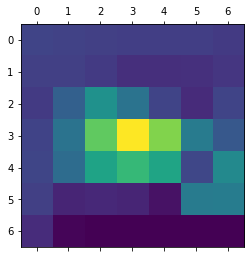

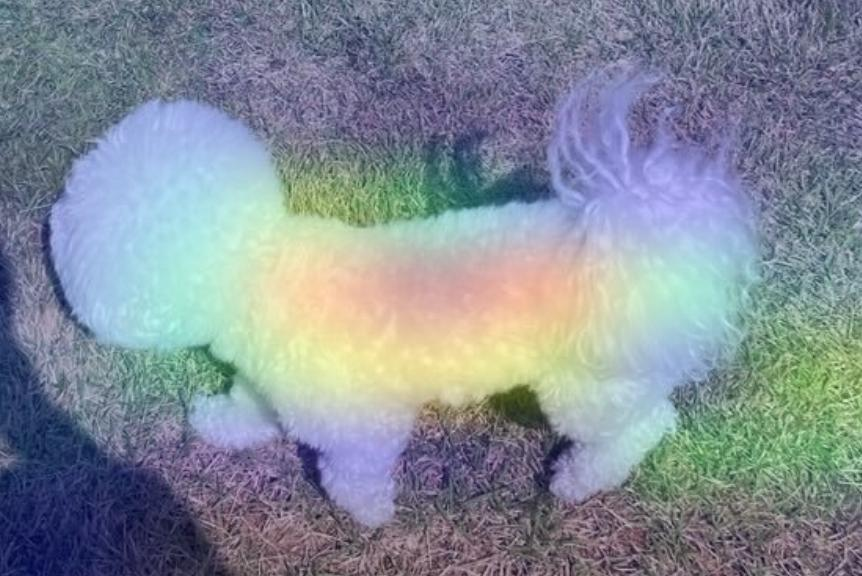

--------------------------------------------------------------------------------
with-leash
[[0.9954709  0.00452914]]


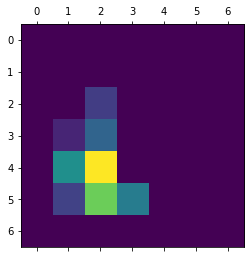

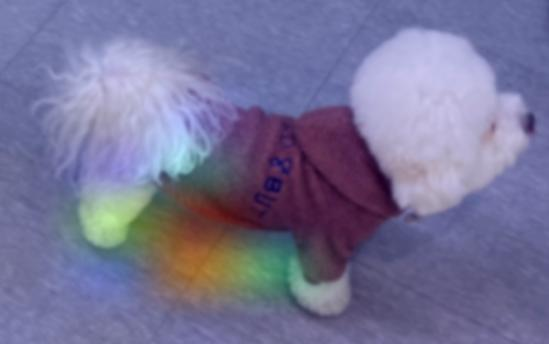

--------------------------------------------------------------------------------
without-leash
[[3.3083896e-04 9.9966919e-01]]


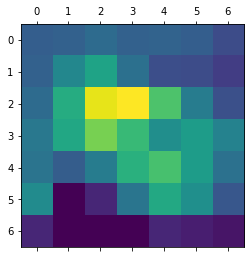

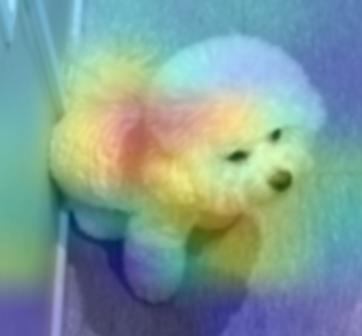

--------------------------------------------------------------------------------
without-leash
[[0.00107307 0.99892694]]


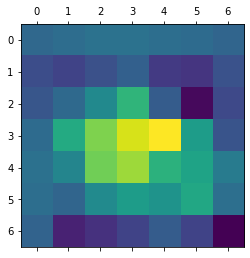

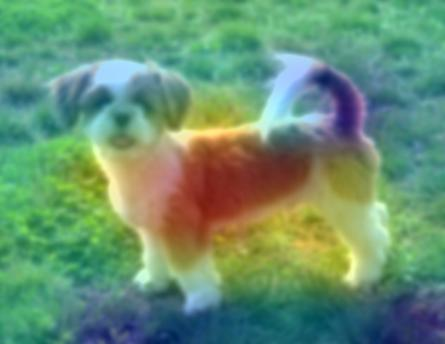

--------------------------------------------------------------------------------


In [ ]:
for i in imgs_without:
    gcm.show_GradCAM(i,img_size=(224,224),model=new_model,last_conv_layer_name = 'conv5_block3_3_conv')